# Judea Pearl: The Ladder of Causation

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# IterTools
from itertools import combinations

# Statistical Models
from scipy import stats

# Networkx
import networkx as nx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#### Setting Viz Parameters

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

### Association

#### The Bookstore Example

In [4]:
# First, we'll build a structural causal model (SCM)
class BookSCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_0 = stats.uniform()
        self.u_1 = stats.norm()
        
    def sample(self, sample_size=100):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_0 = self.u_0.rvs(sample_size)
        u_1 = self.u_1.rvs(sample_size)
        a = u_0 > .61
        b = (a + .5 * u_1) > .2
        
        return a, b

In [5]:
# Let's initialize our SCM
scm = BookSCM(random_seed=45)

In [6]:
# ...and sample from it
buy_book_a, buy_book_b = scm.sample(100)

In [7]:
# Sanity check
buy_book_a.shape, buy_book_b.shape

((100,), (100,))

In [8]:
# Let's compute probabilities
proba_book_a = buy_book_a.sum() / buy_book_a.shape[0]
proba_book_b = buy_book_b.sum() / buy_book_b.shape[0]

print(f'Probability of buying book A: {proba_book_a:0.3f}')
print(f'Probability of buying book B: {proba_book_b:0.3f}')

# ...and conditional probailities
proba_book_a_given_book_b = np.where(buy_book_b, buy_book_a, 0).sum() / buy_book_b.sum()
proba_book_b_given_book_a = np.where(buy_book_a, buy_book_b, 0).sum() / buy_book_a.sum()

print(f'Probability of buying book A given B: {proba_book_a_given_book_b:0.3f}')
print(f'Probability of buying book B given A: {proba_book_b_given_book_a:0.3f}')

Probability of buying book A: 0.390
Probability of buying book B: 0.580
Probability of buying book A given B: 0.638
Probability of buying book B given A: 0.949


### Intervention

In [9]:
SAMPLE_SIZE = 100

np.random.seed(45)

u_0 = np.random.randn(SAMPLE_SIZE)
u_1 = np.random.randn(SAMPLE_SIZE)
a = u_0
b = 5 * a + u_1

r, p = stats.pearsonr(a, b)

print(f'Mean of B before any intervention: {b.mean():.3f}')
print(f'Variance of B before any intervention: {b.var():.3f}')
print(f'Correlation between A and B:\nr = {r:.3f}; p = {p:.3f}\n')

a = np.array([1.5] * SAMPLE_SIZE)
b = 5 * a + u_1

print(f'Mean of B after the intervention on A: {b.mean():.3f}')
print(f'Variance of B after the intervention on A: {b.var():.3f}\n')

a = u_0
b = np.random.randn(SAMPLE_SIZE)

r, p = stats.pearsonr(a, b)

print(f'Mean of B after the intervention on B: {b.mean():.3f}')
print(f'Variance of B after the intervention on B: {b.var():.3f}')
print(f'Correlation between A and B after intervening on B:\nr = {r:.3f}; p = {p:.3f}\n')

Mean of B before any intervention: -0.620
Variance of B before any intervention: 22.667
Correlation between A and B:
r = 0.978; p = 0.000

Mean of B after the intervention on A: 7.575
Variance of B after the intervention on A: 1.003

Mean of B after the intervention on B: 0.186
Variance of B after the intervention on B: 0.995
Correlation between A and B after intervening on B:
r = -0.023; p = 0.821



### Counterfactuals

In [10]:
class CounterfactualSCM:
    
    def abduct(self, t, y):
        return (t + y - 1)/(2*t - 1)
    
    def modify(self, t):
        return lambda u: t * u + (t - 1) * (u - 1)
        
    def predict(self, u, t):
        return self.modify(t)(u)

In [11]:
coffee = CounterfactualSCM()
t = 1
y = 1

In [12]:
u = coffee.abduct(t=t, y=y)
u

1.0

In [13]:
coffee.predict(u=u, t=0)

0.0

### Causation without Correlation - Plots

#### Non-Monotonic Case

In [14]:
x = np.random.uniform(-2, 2, 5000)

y = x**2 + 0.2*np.random.randn(len(x))

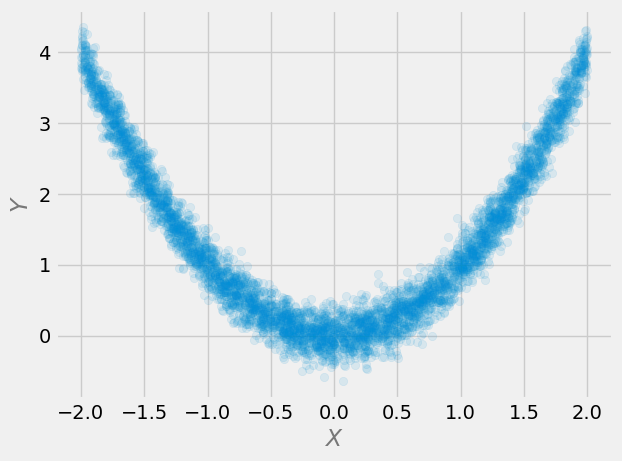

In [15]:
plt.scatter(x, y, alpha=.1)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
plt.show()

In [16]:
# Correlation coefficient
stats.spearmanr(x, y)

SignificanceResult(statistic=-0.017571125214845006, pvalue=0.21414381254206408)

### Bad Sampling Case

In [17]:
# Get initial x
x = np.random.uniform(-2, 2, 5000)

# Filter samples
x = x[np.where((x < -1.9) | (x > 1.9), True, False)]

# Get y
y = x**2 + 0.2*np.random.randn(len(x))

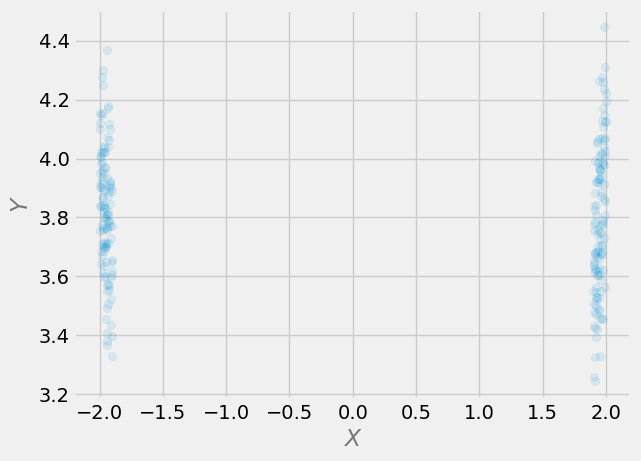

In [18]:
plt.scatter(x, y, alpha=.1)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
plt.show()

In [19]:
# Correlation coefficient
stats.spearmanr(x, y)

SignificanceResult(statistic=0.0075097809299378045, pvalue=0.9092243672544423)